In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset=pd.read_csv(r'C:\Users\user\AppData\Local\Temp\Rar$DI73.720\IMDb Movies India.csv', encoding='latin-1')
dataset.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
dataset.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [9]:
dataset.isnull()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [11]:
dataset.shape

(15509, 10)

In [12]:
dataset.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [13]:
attribute=dataset.columns
print(attribute)


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [14]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [15]:
shape=dataset.shape
print(f"Number of rows:{shape[0]},Number of columns:{shape[1]}")

Number of rows:15509,Number of columns:10


In [16]:
unique_genres=dataset['Genre'].unique()
print("Unique Genres:",unique_genres)

Unique Genres: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family,

In [17]:
rating_dist=dataset['Rating'].value_counts()
print("Rating Distribution:\n",rating_dist)

Rating Distribution:
 6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [19]:
dataset.drop_duplicates(inplace=True)

In [20]:
attributes=['Name','Year','Duration','Votes','Rating']
dataset.dropna(subset=attribute,inplace=True)
missing_val=dataset.isna().sum()
print(missing_val)

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [21]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [22]:
movie_name_rating=dataset[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


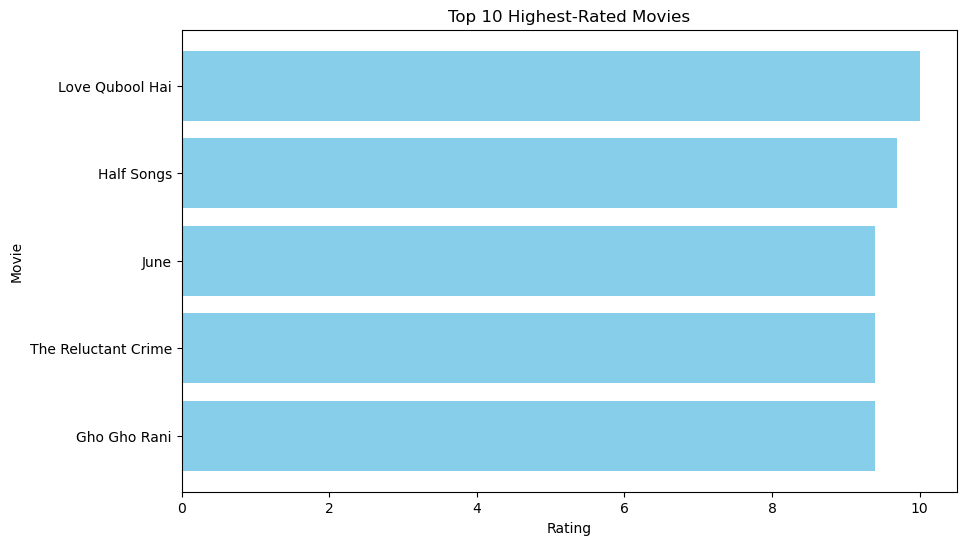

In [23]:
top_rated_movie=dataset.sort_values(by='Rating',ascending=False).head()
plt.figure(figsize=(10,6))
plt.barh(top_rated_movie['Name'],top_rated_movie['Rating'],color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show()

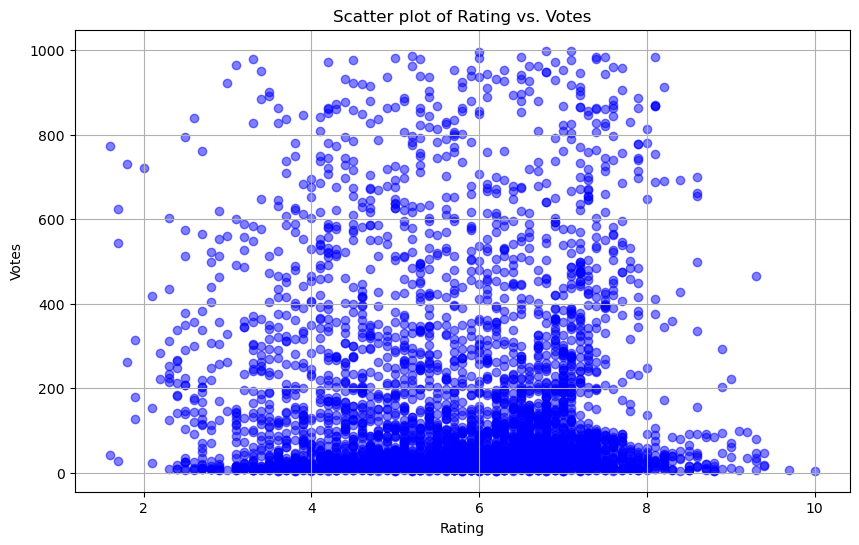

In [24]:
dataset['Votes']=pd.to_numeric(dataset['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(dataset['Rating'],dataset['Votes'],alpha=0.5,color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter plot of Rating vs. Votes')
plt.grid(True)
plt.show()

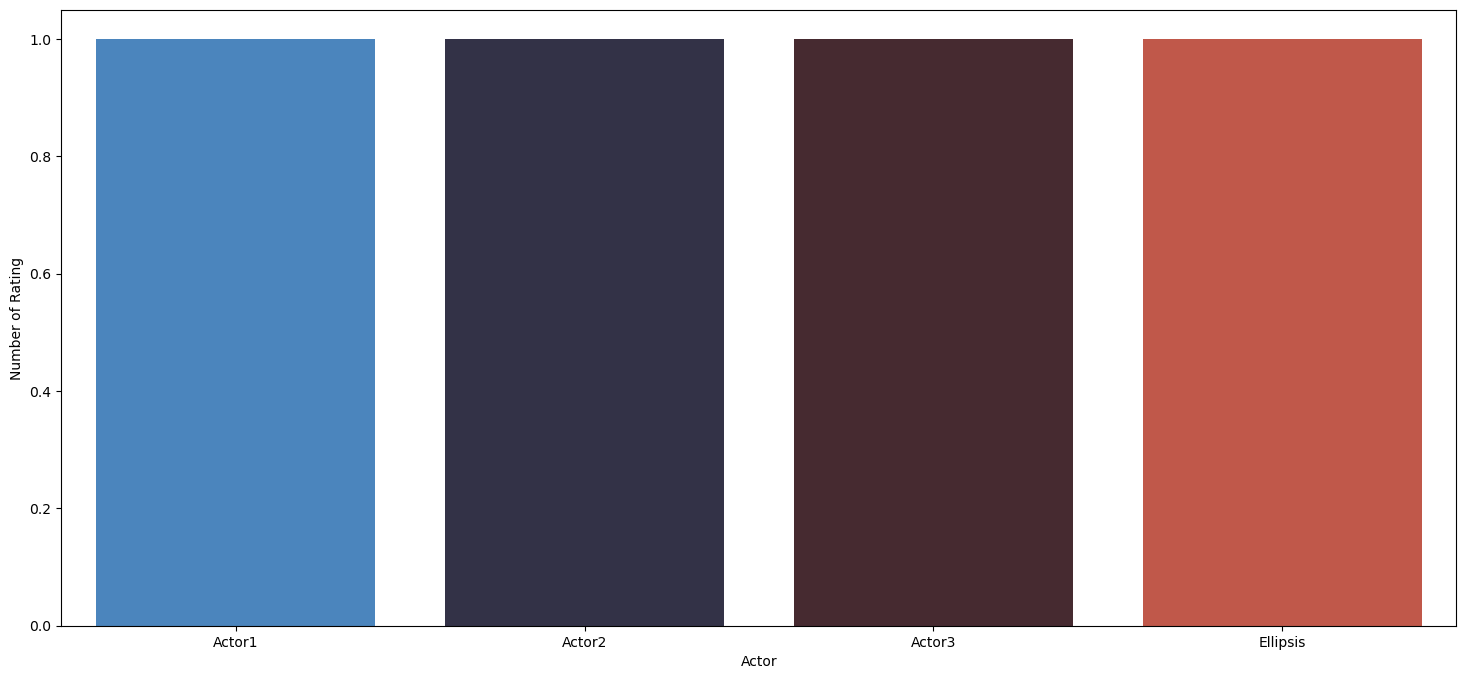

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
your_data = pd.DataFrame({
    'Actor': ['Actor1', 'Actor2', 'Actor3', ...],
    'Number of Rating': [10, 15, 20, ...]
})
actor_counts = your_data['Actor'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number of Rating']
plt.figure(figsize=(18, 8))
sns.barplot(x='Actor', y='Number of Rating', data=actor_counts.head(10), palette='icefire')
plt.show()

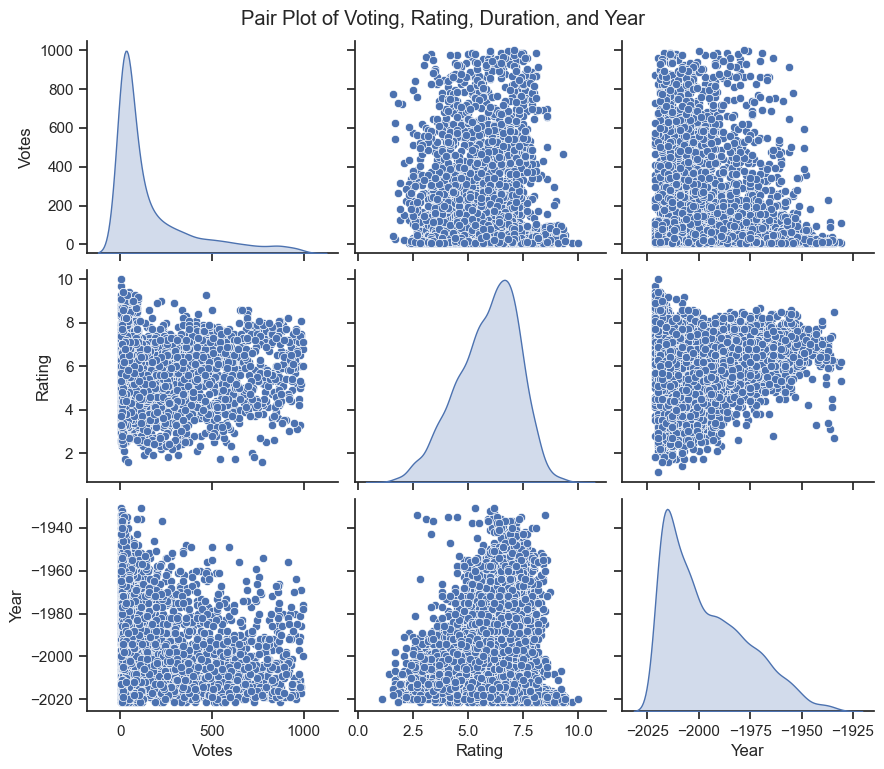

In [26]:
columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style='ticks')
sns.pairplot(dataset[columns_of_interest], diag_kind='kde', markers='o', palette='viridis', height=2.5, aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating, Duration, and Year', y=1.02)
plt.show()

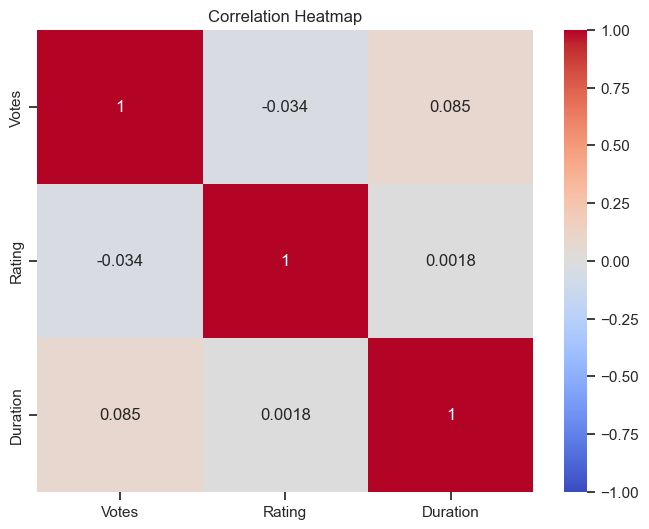

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['Votes', 'Rating', 'Duration']
dataset['Duration'] = pd.to_numeric(dataset['Duration'].str.extract('(\d+)', expand=False), errors='coerce')
correlation_matrix = dataset[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
dataset_sorted=dataset.sort_values(by='Votes',ascending=False)
dataset_sorted['Vote_Count_Percentile']=dataset_sorted['Votes'].rank(pct=True)*100
dataset_sorted.reset_index(drop=True,inplace=True)
print(dataset_sorted[['Name','Votes','Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.976695
2                              Kurukshetra  996.0              99.953391
3                              Dishkiyaoon  986.0              99.930086
4                               Kadvi Hawa  985.0              99.895129
...                                    ...    ...                    ...
5654                                 Ziddi    NaN                    NaN
5655                        Zila Ghaziabad    NaN                    NaN
5656                                 Zinda    NaN                    NaN
5657              Zindagi Na Milegi Dobara    NaN                    NaN
5658                              Zubeidaa    NaN                    NaN

[5659 rows x 3 columns]


In [29]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [30]:
dataset=dataset.dropna(subset=['Votes'])
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,-2012.0,82,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [31]:
dataset['Duration']=dataset['Duration'].astype(str)
dataset['Duration']=dataset['Duration'].str.extract('(\d+)').astype(float)
x=dataset[['Duration','Votes']]
y=dataset['Rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()

model.fit(x_train,y_train)



LinearRegression()

In [32]:
y_pred=model.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")



Mean Absolute Error: 1.143617204764807
Root Mean Squared Error: 1.405517388198603
R-squared (R2) Score: 0.0019888252665022366


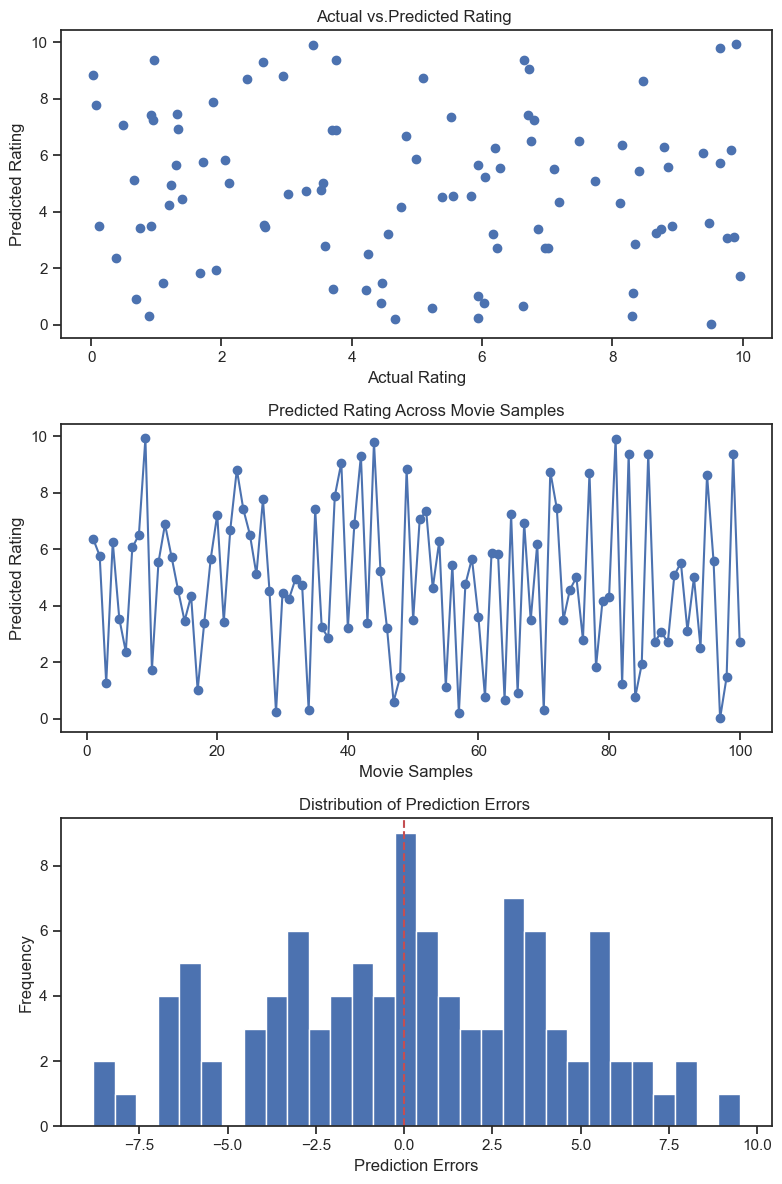

In [33]:
y_test=np.random.rand(100)*10
y_pred=np.random.rand(100)*10
errors=y_test-y_pred
fig,axs=plt.subplots(3,1,figsize=(8,12))
axs[0].scatter(y_test,y_pred)
axs[0].set_xlabel("Actual Rating")
axs[0].set_ylabel("Predicted Rating")
axs[0].set_title("Actual vs.Predicted Rating ")
movie_samples=np.arange(1,len(y_pred)+1)
axs[1].plot(movie_samples,y_pred,marker='o',linestyle='-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Rating")
axs[1].set_title("Predicted Rating Across Movie Samples")
axs[2].hist(errors,bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors ")
axs[2].axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.show()

